Letterboxd data loaded successfully.
Top Movies data loaded successfully.
Merging data
Index(['id', 'name', 'date', 'tagline', 'description', 'minute', 'rating',
       'role', 'name_crew', 'type', 'language', 'studio', 'country', 'genre'],
      dtype='object')
Merged data
Columns:  Index(['id', 'name', 'date', 'tagline', 'description', 'minute', 'rating',
       'role', 'name_crew', 'type', 'language', 'studio', 'country', 'genre',
       'average_rating', 'duration'],
      dtype='object')
Mean Absolute Error: 12012789.964526067
R^2 Score: 0.9326532462988735


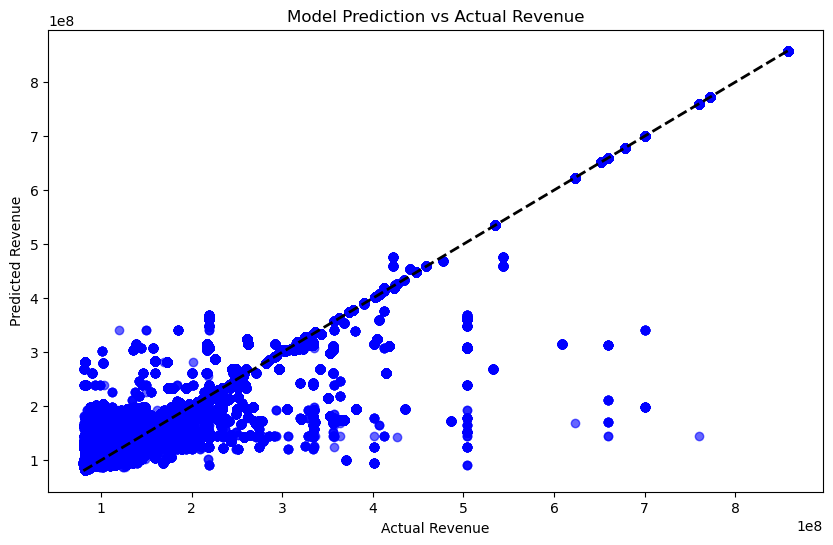

Model saved to 'Random_Forest_Regressor_Model.png'


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib  # To save the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, r2_score
from letterbox import Letterboxd
from revenue import RevenueData

def process_data_and_train_model(letterboxd, revenue_data):
    print('Merging data')
    merged_data = letterboxd.merge_data() 
    print(merged_data.columns)
    revenue_data_df = revenue_data.top_movies_data.rename(columns={'Movie': 'name', 'Lifetime Gross': 'revenue'})
    merged_data = merged_data.merge(revenue_data_df[['name', 'revenue']], on='name', how='left')
    print('Merged data')

    merged_data = merged_data.dropna(subset=['revenue'])

    merged_data['average_rating'] = merged_data['rating'].fillna(0)
    merged_data['duration'] = merged_data['minute'].fillna(0)

    X = merged_data.drop(columns=['revenue'])
    y = merged_data['revenue']

    print("Columns: ", X.columns)

    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1,  
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')

    plt.figure(figsize=(10, 6))

    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    
    # Plotting the ideal 1:1 line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

    plt.title('Model Prediction vs Actual Revenue')
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    plt.show()

    joblib.dump(model, 'Random_Forest_Regressor_Model.png')
    print("Model saved to 'Random_Forest_Regressor_Model.png'")

if __name__ == "__main__":
    base_path = "data"
    
    letterboxd = Letterboxd(base_path)
    revenue_data = RevenueData(base_path)

    letterboxd.load_data()
    revenue_data.load_top_movies_data()

    process_data_and_train_model(letterboxd, revenue_data)